# Market Data

This notebook demonstrates getting market data from IEX Cloud using pyEX library.

I'm storing secrets natively in macOS KeyChain. You can use (keyring)[https://github.com/jaraco/keyring] to store / retrieve secrets from KeyChain. Again an excellent library to manage secrets using system keyring service (macOS KeyChain or Windows Credential Locker)

In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
import pyEX as p
import pandas as pd
import numpy as np
import cufflinks as cf
import os

from shared.environment import Paths, Secrets

cf.set_config_file(theme='space',offline=True)
api_token = Secrets.get('IEX_API_KEY')

## Create IEX Client

In [5]:
c = p.Client(api_token=api_token)

## Download Symbols / Exchanges / Sectors

In [6]:
symbols = c.symbolsDF()
exchanges = c.exchangesDF()
sectors = c.sectorsDF()

In [7]:
iexSymbols = c.iexSymbolsDF()

In [8]:
iexSymbols

,date,isEnabled
symbol,,
A,2020-04-14,True
AA,2020-04-14,True
AAAU,2020-04-14,True
AACG,2020-04-14,True
AADR,2020-04-14,True
...,...,...
ICXUSDT,2020-04-14,True
NEOUSDT,2020-04-14,True
VENUSDT,2020-04-14,True


In [11]:
tickers = ['AAPL', 'MSFT', 'INTC', 'AMZN', 'SPY', 'GDX', 'GLD', 'GS']
symbols[symbols.index.isin(tickers)]

,exchange,name,date,type,iexId,region,currency,isEnabled,figi,cik
symbol,,,,,,,,,,
AAPL,NAS,Apple Inc.,2020-04-14,cs,IEX_4D48333344362D52,US,USD,True,BBG000B9XRY4,320193
AMZN,NAS,Amazon.com Inc.,2020-04-14,cs,IEX_4D434E59594C2D52,US,USD,True,BBG000BVPV84,1018724
GDX,PSE,VanEck Vectors Gold Miners ETF,2020-04-14,et,IEX_52345137584E2D52,US,USD,True,BBG000PLNQN7,None
GLD,PSE,SPDR Gold Trust,2020-04-14,et,IEX_475A4A4C52572D52,US,USD,True,BBG000CRF6Q8,None
GS,NYS,Goldman Sachs Group Inc.,2020-04-14,cs,IEX_4A4C4A30565A2D52,US,USD,True,BBG000C6CFJ5,886982
INTC,NAS,Intel Corporation,2020-04-14,cs,IEX_485A365A37512D52,US,USD,True,BBG000C0G1D1,50863
MSFT,NAS,Microsoft Corporation,2020-04-14,cs,IEX_5038523343322D52,US,USD,True,BBG000BPH459,789019
SPY,PSE,SPDR S&P 500 ETF Trust,2020-04-14,et,IEX_4D3735424E4B2D52,US,USD,True,BBG000BDTBL9,884394


## Download Historical Prices

In [17]:
def downloadPrices(tickers, refresh = False):
    prices = f'{Paths.data()}/marketdata/prices.csv'
    if not os.path.exists(prices) or refresh:
        prices_df = c.bulkBatchDF(tickers, 'chart', range_="5y")
        prices_df['chart'].to_csv(prices)
        return prices_df['chart']
    else:
        return pd.read_csv(prices)

In [19]:
prices = downloadPrices(tickers)

In [20]:
# Historical Prices
prices

,change,changeOverTime,changePercent,close,high,label,low,open,symbol,uClose,uHigh,uLow,uOpen,uVolume,volume
date,,,,,,,,,,,,,,,
2015-04-14,0.00,0.000000,0.0000,126.30,127.29,"Apr 14, 15",125.91,127.00,AAPL,126.30,127.29,125.91,127.00,25524593,25524593
2015-04-15,0.48,0.003800,0.3800,126.78,127.13,"Apr 15, 15",126.01,126.41,AAPL,126.78,127.13,126.01,126.41,28970419,28970419
2015-04-16,-0.61,-0.001029,-0.4811,126.17,127.10,"Apr 16, 15",126.11,126.28,AAPL,126.17,127.10,126.11,126.28,28368987,28368987
2015-04-17,-1.42,-0.012272,-1.1255,124.75,126.14,"Apr 17, 15",124.46,125.55,AAPL,124.75,126.14,124.46,125.55,51957046,51957046
2015-04-20,2.85,0.010293,2.2846,127.60,128.12,"Apr 20, 15",125.17,125.57,AAPL,127.60,128.12,125.17,125.57,47054310,47054310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-06,11.30,-0.199727,7.6907,158.23,158.93,"Apr 6, 20",153.77,155.47,GS,158.23,158.93,153.77,155.47,4689431,4689431
2020-04-07,7.79,-0.160328,4.9232,166.02,169.14,"Apr 7, 20",162.45,166.00,GS,166.02,169.14,162.45,166.00,4953506,4953506
2020-04-08,10.94,-0.104997,6.5896,176.96,178.10,"Apr 8, 20",168.55,168.55,GS,176.96,178.10,168.55,168.55,5194782,5194782


### Pivot the Prices dataframe by symbol and closing price

In [21]:
hist_prices = prices.reset_index()[['date', 'symbol', 'close']]

In [22]:
hist_prices = pd.pivot_table(hist_prices, index='date', columns='symbol', values='close')

In [23]:
hist_prices

symbol,AAPL,AMZN,GDX,GLD,GS,INTC,MSFT,SPY
date,,,,,,,,
2015-04-14,126.30,385.11,19.41,114.44,197.72,31.49,41.65,209.49
2015-04-15,126.78,383.45,19.98,115.43,201.10,32.83,42.26,210.43
2015-04-16,126.17,386.04,19.74,115.03,200.21,32.87,42.16,210.37
2015-04-17,124.75,375.56,19.72,115.60,197.35,32.47,41.62,207.95
2015-04-20,127.60,389.51,19.83,114.72,198.10,32.73,42.91,209.85
...,...,...,...,...,...,...,...,...
2020-04-07,259.43,2011.60,26.09,156.04,166.02,58.40,163.49,265.13
2020-04-08,266.07,2043.00,26.20,154.65,176.96,58.98,165.13,274.03
2020-04-09,267.99,2042.76,28.95,158.69,184.26,57.14,165.14,278.20


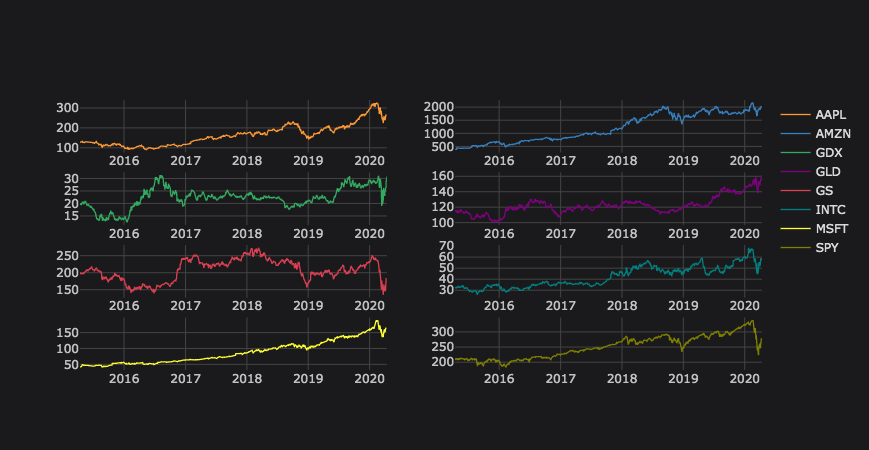

In [24]:
hist_prices.iplot(subplots=True)

### Calculate Stats

In [25]:
hist_prices.mean()

symbol
AAPL     163.820246
AMZN    1202.755909
GDX       22.237349
GLD      122.232444
GS       207.677133
INTC      42.148634
MSFT      87.749468
SPY      250.308976
dtype: float64

In [26]:
hist_prices.aggregate([min, np.mean, np.std, np.median, max]).round(2)

,AAPL,AMZN,GDX,GLD,GS,INTC,MSFT,SPY
min,90.34,375.56,12.47,100.50,134.97,25.87,40.47,182.86
mean,163.82,1202.76,22.24,122.23,207.68,42.15,87.75,250.31
std,53.53,531.12,4.15,11.18,31.50,9.51,35.99,37.36
median,156.83,1010.04,22.42,120.83,211.05,39.63,76.29,249.42
max,327.20,2170.22,31.32,161.41,273.38,68.47,188.70,338.34


### Calculate Percent Change over time

In [27]:
hist_prices.pct_change().round(3).head()

symbol,AAPL,AMZN,GDX,GLD,GS,INTC,MSFT,SPY
date,,,,,,,,
2015-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15,0.004,-0.004,0.029,0.009,0.017,0.043,0.015,0.004
2015-04-16,-0.005,0.007,-0.012,-0.003,-0.004,0.001,-0.002,-0.000
2015-04-17,-0.011,-0.027,-0.001,0.005,-0.014,-0.012,-0.013,-0.012
2015-04-20,0.023,0.037,0.006,-0.008,0.004,0.008,0.031,0.009


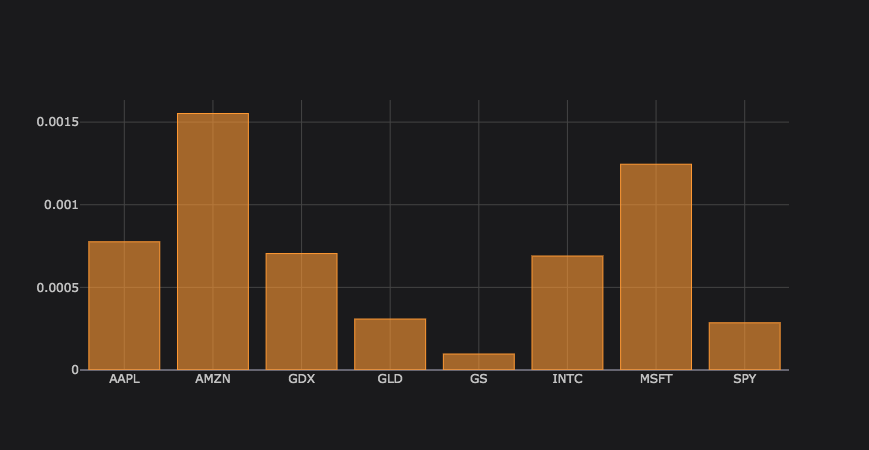

In [28]:
hist_prices.pct_change().mean().iplot(kind='bar')

### Calculate Returns (log)

In [29]:
returns = np.log(hist_prices / hist_prices.shift(1))

In [30]:
returns.head().round(4)

symbol,AAPL,AMZN,GDX,GLD,GS,INTC,MSFT,SPY
date,,,,,,,,
2015-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15,0.0038,-0.0043,0.0289,0.0086,0.0170,0.0417,0.0145,0.0045
2015-04-16,-0.0048,0.0067,-0.0121,-0.0035,-0.0044,0.0012,-0.0024,-0.0003
2015-04-17,-0.0113,-0.0275,-0.0010,0.0049,-0.0144,-0.0122,-0.0129,-0.0116
2015-04-20,0.0226,0.0365,0.0056,-0.0076,0.0038,0.0080,0.0305,0.0091


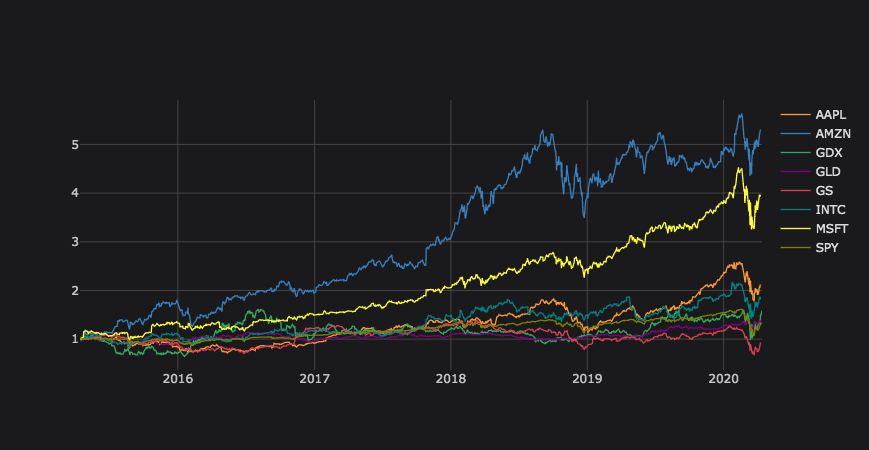

In [31]:
returns.cumsum().apply(np.exp).iplot()

### Resample

In [32]:
monthly_returns = returns.cumsum().apply(np.exp).resample('1m', label='right').last()
monthly_returns.head()

symbol,AAPL,AMZN,GDX,GLD,GS,INTC,MSFT,SPY
date,,,,,,,,
2015-04-30,0.990895,1.095220,1.036064,0.991524,0.993425,1.033661,1.167827,0.995083
2015-05-31,1.031512,1.114565,1.008758,0.997029,1.042838,1.094316,1.125090,1.007876
2015-06-30,0.993112,1.127184,0.914992,0.981912,1.055988,0.966021,1.060024,0.982624
2015-07-31,0.960412,1.392200,0.708398,0.916900,1.037174,0.919339,1.121248,1.004821
2015-08-31,0.892795,1.331801,0.726945,0.950891,0.953874,0.906319,1.044898,0.943577


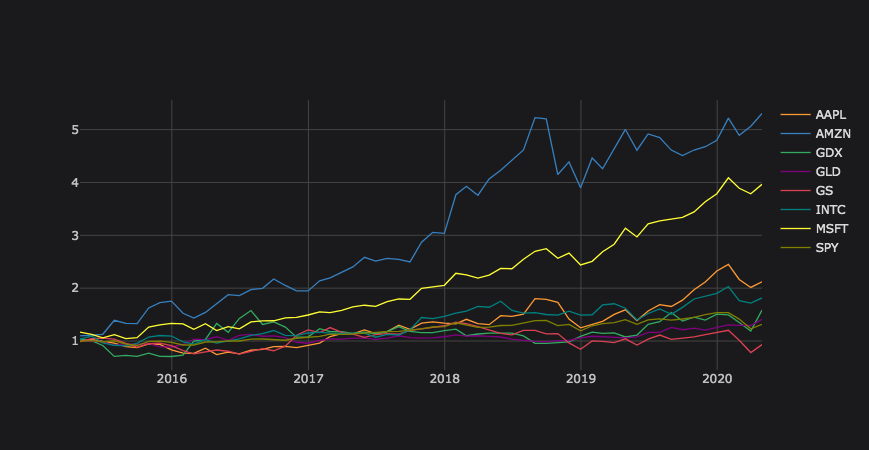

In [33]:
monthly_returns.iplot()

### Rolling Stats

In [34]:
window = 20
symbol = 'AAPL'

data = pd.DataFrame(hist_prices[symbol])
data['min'] = data[symbol].rolling(window=window).min()
data['mean'] = data[symbol].rolling(window=window).mean()
data['max'] = data[symbol].rolling(window=window).max()
data['std'] = data[symbol].rolling(window=window).std()
data['median'] = data[symbol].rolling(window=window).median()
data['ewma'] = data[symbol].ewm(halflife=0.5, min_periods=window).mean()

In [35]:
data

,AAPL,min,mean,max,std,median,ewma
date,,,,,,,
2015-04-14,126.30,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15,126.78,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-16,126.17,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-17,124.75,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-20,127.60,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-04-07,259.43,224.37,249.9295,277.97,12.980447,247.31,258.925919
2020-04-08,266.07,224.37,249.4615,277.97,12.155154,247.31,264.283980
2020-04-09,267.99,224.37,250.4495,277.97,12.833906,247.31,267.063495


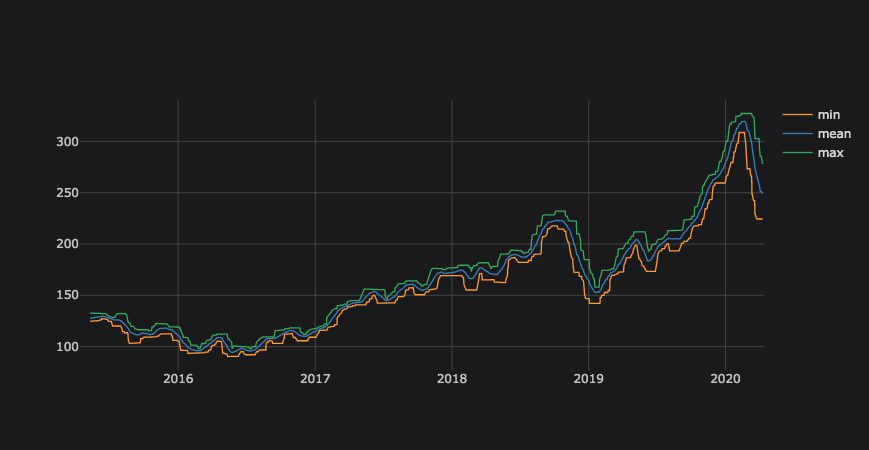

In [36]:
data[['min', 'mean', 'max']].iplot()

In [37]:
data['SMA1'] = data[symbol].rolling(window=42).mean()
data['SMA2'] = data[symbol].rolling(window=252).mean()
data

,AAPL,min,mean,max,std,median,ewma,SMA1,SMA2
date,,,,,,,,,
2015-04-14,126.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15,126.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-16,126.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-17,124.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-20,127.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-04-07,259.43,224.37,249.9295,277.97,12.980447,247.31,258.925919,277.687857,239.860754
2020-04-08,266.07,224.37,249.4615,277.97,12.155154,247.31,264.283980,276.403095,240.124921
2020-04-09,267.99,224.37,250.4495,277.97,12.833906,247.31,267.063495,275.127857,240.392262


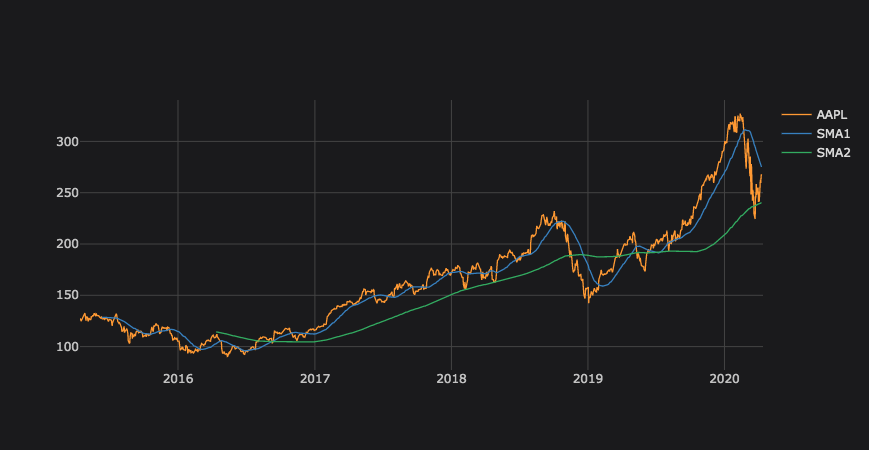

In [38]:
data[[symbol, 'SMA1', 'SMA2']].iplot()

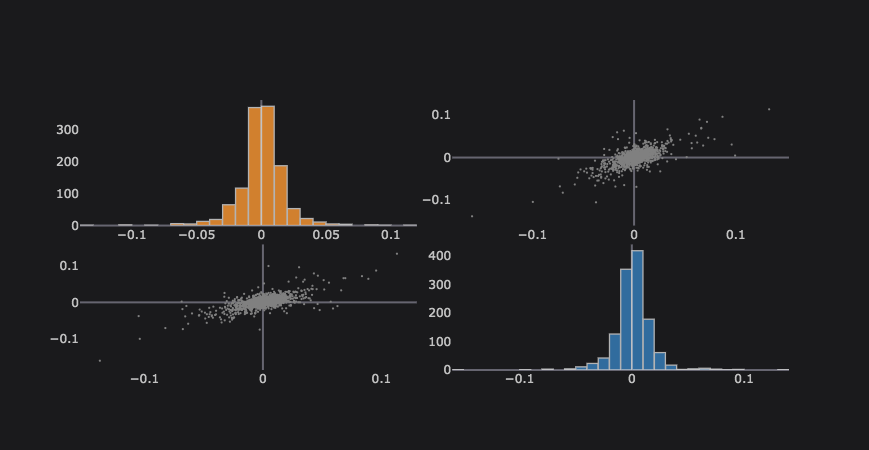

In [39]:
fig = returns[['AAPL', 'MSFT']].scatter_matrix(asFigure=True, bins=35)
cf.iplot(fig)

### Correlation

In [40]:
returns[['AAPL', 'MSFT', 'SPY', 'GLD']].corr()

symbol,AAPL,MSFT,SPY,GLD
symbol,,,,
AAPL,1.000000,0.696036,0.769553,-0.063834
MSFT,0.696036,1.000000,0.825662,-0.069407
SPY,0.769553,0.825662,1.000000,-0.054026
GLD,-0.063834,-0.069407,-0.054026,1.000000


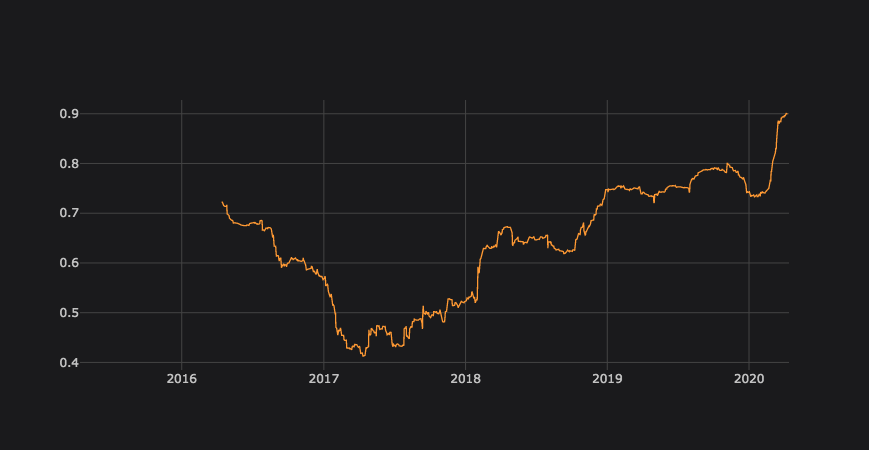

In [41]:
returns['AAPL'].rolling(window=252).corr(returns['SPY']).iplot()